### Loss Function
$J(w)=\frac{\|w\|^2}{2}+C\frac{1}{N}\sum_{i=1}^{N} max(0, 1-y_i(w^Tx_i+b)) $

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_data(dataset):
    data = load_svmlight_file("../../dataset/{}".format(dataset))
    # data = load_svmlight_file("../dataset/australian_scale")
    input_data = data[0].toarray()
    return input_data, data[1]

In [4]:
def get_dataset(x, y):
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)
    return x_train, x_test, y_train, y_test

In [5]:
def initial_w(dimension):
    w = np.zeros((dimension, 1))
    # w = np.random.random((dimension, 1))
    # w = np.random.normal(size=(dimension, 1))
    return w

In [13]:
def plot_loss(training_loss, testing_loss, y_title="Accuracy"):
    x = np.array(range(1, len(training_loss)+1))
    plt.figure()
    plt.plot(x, np.array(training_loss), label="train")
    plt.plot(x, np.array(testing_loss), label="test")
    plt.xlabel("Epoch")
    plt.ylabel(y_title)
    plt.title("Experiment")
    plt.legend()
    plt.show()


In [15]:
def main(dataset, lr, nEpochs, C):
    # get dataset
    input_data, label = get_data(dataset)
    x_train, x_test, y_train, y_test = get_dataset(input_data, label)

    # initialize the w
    w = initial_w(dimension=(14+1))

    # handle b
    train_column = np.ones((len(x_train), 1))
    x_train = np.column_stack((x_train, train_column))
    test_column = np.ones((len(x_test), 1))
    x_test = np.column_stack((x_test, test_column))

    # plot
    training_accuracy_list = []
    testing_accuracy_list = []
    training_loss_list = []
    testing_loss_list = []

    for i in range(nEpochs):
        # calculate the gradient
        temp = 1 - (y_train.reshape(-1, 1) * np.dot(x_train, w))
        temp[temp<=0] = 0
        grad = w - C * (np.dot(np.transpose(x_train), temp * y_train.reshape(-1, 1)))/len(x_train)
        
        # update
        w = w - lr * grad

        # training accuracy and testing accuracy
        hit = np.dot(x_train, w) * y_train.reshape(-1, 1)
        training_accuracy = float(len(hit[hit>0]))/len(hit)

        hit = np.dot(x_test, w) * y_test.reshape(-1, 1)
        testing_accuracy = float(len(hit[hit>0]))/len(hit)

        training_accuracy_list.append(training_accuracy)
        testing_accuracy_list.append(testing_accuracy)
        print("training accuracy:[{}] testing accuracy:[{}]".format(training_accuracy, testing_accuracy))
        
        # training error and testing error
        temp = 1 - (y_train.reshape(-1, 1) * np.dot(x_train, w))
        temp[temp<=0] = 0
        training_loss = (1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_train)
        training_loss = training_loss.reshape(-1)

        temp = 1 - (y_test.reshape(-1, 1) * np.dot(x_test, w))
        temp[temp<=0] = 0
        testing_loss = (1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_test)
        testing_loss = testing_loss.reshape(-1)

        training_loss_list.extend(training_loss)
        testing_loss_list.extend(testing_loss)
        print("training error:[{}] testing error:[{}]".format(training_loss, testing_loss))

    # plot
    plot_loss(training_accuracy_list, testing_accuracy_list, y_title="Accuracy")
    plot_loss(training_loss_list, testing_loss_list, y_title="Loss")

training accuracy:[0.8239845261121856] testing accuracy:[0.8323699421965318]
training error:[[ 0.12363924]] testing error:[[ 0.12363029]]
training accuracy:[0.8259187620889749] testing accuracy:[0.8265895953757225]
training error:[[ 0.12256665]] testing error:[[ 0.12255394]]
training accuracy:[0.8278529980657641] testing accuracy:[0.8323699421965318]
training error:[[ 0.12171824]] testing error:[[ 0.12170568]]
training accuracy:[0.8297872340425532] testing accuracy:[0.8323699421965318]
training error:[[ 0.12104475]] testing error:[[ 0.12103524]]
training accuracy:[0.8278529980657641] testing accuracy:[0.8265895953757225]
training error:[[ 0.12050819]] testing error:[[ 0.12050382]]
training accuracy:[0.8297872340425532] testing accuracy:[0.8323699421965318]
training error:[[ 0.12007914]] testing error:[[ 0.12008135]]
training accuracy:[0.8297872340425532] testing accuracy:[0.8323699421965318]
training error:[[ 0.11973478]] testing error:[[ 0.11974452]]
training accuracy:[0.8317214700193

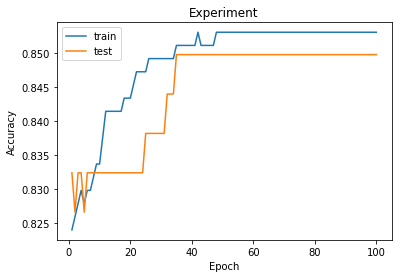

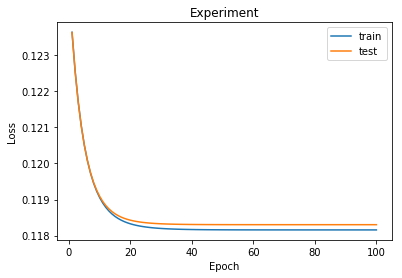

In [16]:
if __name__ == '__main__':
    main(dataset='australian_scale', lr=0.1, nEpochs=100, C=2**-3)